# Project 2: Ames, Iowa Kaggle Competition
---

## Contents:
* [Problem Statement](#Problem-Statement)
* [Executive Summary](#Executive-Summary)
* [Exploratory Data Analysis](#EDA)
  * [Import Libraries](#Import-Libraries)
  * [Import The Data](#Import-The-Data)
  * [Check The Data](#Check-The-Data)
  * [Clean The Data](#Clean-The-Data)
  * [Feature Engineering](#Feature-Engineering)
  * [Visualize The Data](#Visualize-The-Data)
  * [Choosing Feature Columns](#Choosing-Feature-Columns)
* [Create Models](#Create-Models)
  * [1 Linear Regression](#1-Linear-Regression)
  * [2 Ridge Model](#2-Ridge-Model)  
  * [3 Lasso Model](#3-Lasso-Model)  
  * [4 Standard Scaler & Linear Regression](#4-Standard-Scaler-and-Linear-Regression) 
  * [5 Standard Scaler & Ridge Model](#5-Standard-Scaler-and-Ridge-Model) 
  * [6 Standard Scaler & Lasso Model](#6-Standard-Scaler-and-Lasso-Model) 
  * [7 Standard Scaler & Elastic Net Model](#7-Standard-Scaler-and-Elastic-Net-Model) 
  * [8 Standard Scaler, Polynomial Features & Linear Regression](8-#Standard-Scaler-Polynomial-Features-and-Linear-Regression) 
  * [9 Standard Scaler, Polynomial Features & Ridge Model](#9-Standard-Scaler-Polynomial-Features-and-Linear-Regression) 
  * [10 Standard Scaler, Polynomial Features & Lasso Model](#10-Standard-Scaler-Polynomial-Features-and-Lasso-Model) 
  * [11 Standard Scaler, Polynomial Features & Elastic Net Model](#11-Standard-Scaler-Polynomial-Features-and-Elastic-Net-Model) 
  * [12 Standard Scaler, Polynomial Features, Power Transform & Linear Regression](#12-Standard-Scaler-Polynomial-Features-Power-Transform-and-Linear-Regression)  
  * [13 Standard Scaler, Polynomial Features, Power Transform & Ridge Model](#13-Standard-Scaler-Polynomial-Features-Power-Transform-and-Ridge-Model) 
  * [14 Standard Scaler, Polynomial Features, Power Transform & Lasso Model](#14-Standard-Scaler-Polynomial-Features-Power-Transform-and-Lasso-Model) 
  * [15 Standard Scaler, Polynomial Features, Power Transform & Elastic Net Model](#15-Standard-Scaler-Polynomial-Features-Power-Transform-and-Elastic-Net-Model) 
  * [16 Polynomial Features, Power Transform & Linear Regression](#12-Standard-Scaler-Polynomial-Features-Power-Transform-and-Linear-Regression)  
  * [17 Polynomial Features, Power Transform & Ridge Model](#17-Polynomial-Features-Power-Transform-and-Ridge-Model) 
  * [18 Polynomial Features, Power Transform & Lasso Model](#18-Polynomial-Features-Power-Transform-and-Lasso-Model) 
  * [19 Polynomial Features, Power Transform & Elastic Net Model](#19-Polynomial-Features-Power-Transform-and-Elastic-Net-Model) 
* [Conclusion](#Conclusion)
-----

# Problem Statement
---

#### We are trying to make a price prediction template that can accurately predict the price of a house when given it's features.


# Executive Summary
---

We were approached by Zillow with a task of building a price-prediction template. The idea is to start with just Ames, IA and eventually we would bring it to the rest of the world. Zillow gave us 2 datasets of all houses in the city of Ames, Iowa with multiple columns that describe almost all aspects of the property. the 1st dataset had a column for price, and the 2nd did not. We are supposed to create a model that we can put the 2nd dataset into, and it could predict the prices for each house.Now that we have our task we can work on solving it.

We imported our data and checked the data to see if there are any missing values, incorrect data types, or values that we would need to change in order to correctly process the data. We found that there were many missing values, and many columns that we would need to change its values to properly run them through our model. We put zeros in place of the missing values and put a ranking system in place for all columns that had ordinal values but were not numbered. At this point, all we had left to do was to fix the columns that were not numbers and also not ranked. What we did was we created new columns for each feature that would show up and placed either a 1 or a 0 in the cell depending on whether the house had that feature or not. This practice is called One-Hot-Encoding and it is very common practice. Lastly, we re-analyzed our data to make sure that it is ready to move to the next step.

Now that we had all of our data properly formatted, we created new columns. We found that there were many columns that we felt would be better if it were to be summed together. We also created new columns for houses that were built in the 21st century, and for houses that we classified as 'Mansions'. Creating new columns can be a real hit or miss and we hoped that these would help us with our model. 

Moving on, we wanted to visualize all of our data including our new columns. We performed a report to see if our data is too repetitive, created histograms to look at the distribution of each column, and looked at a few heatmaps to see how each column correlated with each other and how they correlated with the 'SalePrice' column. We were now able to pick and choose our columns so we chose all columns that had a .54 absolute correlation or higher(Between -1:-.54 and .54:1). We looked at our columns again and removed any columns that were colinear with one of our chosen columns. Now we have our features for our model.

We built 15 different models to test out different combinations of estimators, Scalers, Transformers, and whether or not to create Polynomial Features. We split the data into a training and testing set so we can evaluate how well our model predicted the price of those in our testing set. Each of the 15 models gave us different CV Scores, Root mean square error scores, and r^2 scores.

We then created a dictionary showing how each model did so we can compare the scores to each other.

Lastly, we chose the best model that best fit the columns to the Price.



## Import Libraries

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet,LassoCV,RidgeCV,LogisticRegressionCV,ElasticNetCV
from sklearn.metrics import mean_squared_error,recall_score, make_scorer, f1_score, r2_score, SCORERS
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import missingno as msno
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
import pandas_profiling 
%matplotlib inline
warnings.filterwarnings('ignore')


# Import The Data

---

In [2]:
df_train = pd.read_csv("../datasets/train.csv")            
df_test = pd.read_csv("../datasets/test.csv")
df_train.set_index('Id',inplace=True)
df_test.set_index('Id',inplace=True)


# EDA
---

## Check The Data 
---

Look at the shape of the Data Frame

In [3]:
df_train.shape

(2051, 80)

Print all data Types

In [11]:
for i in range(12):
    print(df_train.dtypes[(i*20):i*20+20])

PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street           object
Alley            object
Lot Shape        object
Land Contour     object
Utilities        object
Lot Config       object
Land Slope       object
Neighborhood     object
Condition 1      object
Condition 2      object
Bldg Type        object
House Style      object
Overall Qual      int64
Overall Cond      int64
Year Built        int64
dtype: object
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Heating     

Check for null values

Look at all null columns

In [12]:
df_train.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1909
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

## Clean The Data
---

create a dictionary to change all ordinal columns to a ranking system

In [13]:
# This dictionary was created by Noah Christiansen of DSI-CC7-NYC-Nash
num_list = {'Lot Shape': {'IR1': 1, 'Reg': 4, 'IR2': 2, 'IR3': 3},
             'Utilities': {'AllPub':4, 'NoSeWa':2, 'NoSewr':3, 'ELO':1},
             'Land Slope': {'Gtl':3, 'Sev':2, 'Mod':1},
             'Exter Qual': {'Gd':4, 'TA':3, 'Ex':5, 'Fa':2,'Po':1},
             'Exter Cond': {'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1},
             'Bsmt Cond': {'TA':3, 'Gd':4, 'NA':0, 'Fa':2, 'Po':1, 'Ex':5},
             'Bsmt Qual': {'TA':3, 'Gd':4, 'Fa':2, 'NA':0, 'Ex':5, 'Po':1},
             'Bsmt Exposure': {'No':1, 'Gd':4, 'Av':3, 'NA':0, 'Mn':2},
             'BsmtFin Type 1': {'GLQ':6, 'Unf':1, 'ALQ':5, 'Rec':3, 'NA':0, 'BLQ':4, 'LwQ':2},
             'BsmtFin Type 2': {'Unf':1, 'Rec':3, 'NA':0, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'ALQ':5},
             'Heating QC': {'Ex':5, 'TA':3, 'Gd':4, 'Fa':2, 'Po':1},
             'Electrical': {'SBrkr':5, 'FuseF':3, 'FuseA':4, 'FuseP':2, 'Mix':1},
             'Kitchen Qual': {'Gd':4, 'TA':3, 'Fa':2, 'Ex':5,'Po':1},
             'Functional': {'Typ':8, 'Mod':5, 'Min2':6, 'Maj1':4, 'Min1':7, 'Sev':2, 'Sal':1, 'Maj2':3},
             'Fireplace Qu': {'NA':0, 'TA':3, 'Gd':4, 'Po':1, 'Ex':5, 'Fa':2},
             'Garage Finish': {'RFn':2, 'Unf':1, 'Fin':3, 'NA':0},
             'Garage Qual': {'TA':3, 'Fa':2, 'NA':0, 'Gd':4, 'Ex':5, 'Po':1},
             'Garage Cond': {'TA':3, 'Fa':2, 'NA':0, 'Po':1, 'Gd':4, 'Ex':5},
             'Paved Drive': {'Y':3, 'N':1, 'P':2},
             'Pool QC': {'NA':0, 'Fa':1, 'Gd':3, 'Ex':4, 'TA':2},
             'Fence': {'NA':0, 'MnPrv':3, 'GdPrv':4, 'GdWo':2, 'MnWw':1}
            }

Created a for loop to go through the columns in thge dictionary and fix the values in the DataFrame.
Then take all Null values and assign it with a zero

In [14]:
for col in num_list.keys():
    df_train[col] = df_train[col].map(num_list[col])
    df_test[col] = df_test[col].map(num_list[col])
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# Feature Engineering
---

Create a list of columns that we will create dummy variables from

In [15]:
# This dummy list was created by Vonn Johnson of DSI-CC7-NYC-Nash
dummies = ['MS SubClass',
          'MS Zoning',
          'Street',
          'Alley',
          'Land Contour',
          'Lot Config',
          'Neighborhood',
          'Condition 1',
           'Condition 2',
           'Bldg Type',
           'House Style',
           'Roof Style',
           'Roof Matl',
           'Exterior 1st',
           'Exterior 2nd',
           'Mas Vnr Type',
           'Foundation',
           'Heating',
           'Central Air',
           'Garage Type',
           'Misc Feature',
           'Sale Type']

Create the dummy columns and add it to the training and testing set

In [16]:
df_train = pd.get_dummies(df_train,columns = dummies, drop_first=True)
df_test = pd.get_dummies(df_test,columns = dummies, drop_first=True)

Check to make sure there are no more null values

In [17]:
df_train.isnull().sum().sum()

0

Create a bunch of new columns by combining other columns

In [18]:
df_train['New Build'] = (df_train['Year Built']==df_train['Yr Sold']).astype(int)
df_train['SF_Sum'] = df_train['BsmtFin SF 1']+df_train['BsmtFin SF 2']+df_train['Bsmt Unf SF']+df_train['Total Bsmt SF']+df_train['1st Flr SF']*2+df_train['2nd Flr SF']*2+df_train['Wood Deck SF']+df_train['Open Porch SF']
df_test['New Build'] = (df_test['Year Built']==df_test['Yr Sold']).astype(int)
df_test['SF_Sum'] = df_test['BsmtFin SF 1']+df_test['BsmtFin SF 2']+df_test['Bsmt Unf SF']+df_test['Total Bsmt SF']+df_test['1st Flr SF']*2+df_test['2nd Flr SF']*2+df_test['Wood Deck SF']+df_test['Open Porch SF']
df_train['Quals'] = df_train["Overall Qual"]+df_train["Exter Qual"]+df_train["Bsmt Qual"]+df_train["Kitchen Qual"]+df_train["Garage Qual"]
df_test['Quals'] = df_test["Overall Qual"]+df_test["Exter Qual"]+df_test["Bsmt Qual"]+df_test["Kitchen Qual"]+df_test["Garage Qual"]
df_train['Bsmt']=df_train["Bsmt Cond"]+df_train["Bsmt Exposure"]+df_train["BsmtFin Type 1"]+df_train["BsmtFin Type 2"]
df_test['Bsmt'] =df_test["Bsmt Cond"]+df_test["Bsmt Exposure"]+df_test["BsmtFin Type 1"]+df_test["BsmtFin Type 2"]
df_train['Garage'] = df_train["Garage Yr Blt"]+df_train["Garage Finish"]+df_train["Garage Cars"]+df_train["Garage Cond"]+df_train["Garage Qual"]**2
df_test['Garage'] = df_test["Garage Yr Blt"]+df_test["Garage Finish"]+df_test["Garage Cars"]+df_test["Garage Cond"]+df_test["Garage Qual"]**2
df_test['Mansion'] = (df_test['SF_Sum']>=6169).astype(int)
df_train['Mansion'] = (df_train['SF_Sum']>=6169).astype(int)
df_test['New'] = (df_test['Year Built']>=2000).astype(int)
df_train['New'] = (df_train['Year Built']>=2000).astype(int)
df_train['Bed_bath_inter'] = (df_train['Bedroom AbvGr'])*(df_train['Full Bath']+(.5*df_train['Half Bath']))
df_test['Bed_bath_inter'] = (df_test['Bedroom AbvGr'])*(df_test['Full Bath']+(.5*df_test['Half Bath']))
df_train['Baths'] =df_train["Bsmt Full Bath"]+(.5*df_train["Bsmt Half Bath"])+df_train["Full Bath"]+(.5*df_train["Half Bath"])
df_test['Baths'] = df_test["Bsmt Full Bath"]+(.5*df_test["Bsmt Half Bath"])+df_test["Full Bath"]+(.5*df_test["Half Bath"])
df_train['Pool'] = df_train["Pool Area"]+df_train["Pool QC"]
df_test['Pool'] = df_test["Pool Area"]+df_test["Pool QC"]

# Visualize The Data
---

Perform a Pandas Profiling Profile Report to evaluate my data and columns

In [19]:
pandas_profiling.ProfileReport(df_train)

Look at the metrics of our data (Mean, STD, Median...)

In [20]:
df_train.describe().T

count          mean           std          min  \
PID                  2049.0  7.134001e+08  1.886859e+08  526301100.0   
Lot Frontage         2049.0  5.778575e+01  3.263387e+01          0.0   
Lot Area             2049.0  1.002468e+04  6.608512e+03       1300.0   
Lot Shape            2049.0  2.930698e+00  1.415621e+00          1.0   
Utilities            2049.0  3.998536e+00  4.938888e-02          2.0   
Land Slope           2049.0  2.909224e+00  4.105040e-01          1.0   
Overall Qual         2049.0  6.108346e+00  1.421780e+00          1.0   
Overall Cond         2049.0  5.562714e+00  1.104897e+00          1.0   
Year Built           2049.0  1.971673e+03  3.017129e+01       1872.0   
Year Remod/Add       2049.0  1.984166e+03  2.103279e+01       1950.0   
Mas Vnr Area         2049.0  9.773694e+01  1.719364e+02          0.0   
Exter Qual           2049.0  3.404588e+00  5.861341e-01          2.0   
Exter Cond           2049.0  3.085896e+00  3.729648e-01          1.0   
Bsmt Qual            2049.0  3.488531e+00  9.008407e-01          0.0   
Bsmt Cond            2049.0  2.929234e+00  5.722842e-01          0.0   
Bsmt Exposure        2049.0  1.626647e+00  1.077419e+00          0.0   
BsmtFin Type 1       2049.0  3.562225e+00  2.125266e+00          0.0   
BsmtFin SF 1         2049.0  4.378048e+02  4.398427e+02          0.0   
BsmtFin Type 2       2049.0  1.274768e+00  9.499963e-01          0.0   
BsmtFin SF 2         2049.0  4.798243e+01  1.650378e+02          0.0   
Bsmt Unf SF          2049.0  5.672484e+02  4.450875e+02          0.0   
Total Bsmt SF        2049.0  1.053036e+03  4.268144e+02          0.0   
Heating QC           2049.0  4.157638e+00  9.642240e-01          1.0   
Electrical           2049.0  4.885310e+00  4.026571e-01          1.0   
1st Flr SF           2049.0  1.160848e+03  3.790661e+02        334.0   
2nd Flr SF           2049.0  3.291869e+02  4.255957e+02          0.0   
Low Qual Fin SF      2049.0  5.518302e+00  5.109351e+01          0.0   
Gr Liv Area          2049.0  1.495553e+03  4.857836e+02        334.0   
Bsmt Full Bath       2049.0  4.260615e-01  5.215326e-01          0.0   
Bsmt Half Bath       2049.0  6.295754e-02  2.508564e-01          0.0   
...                     ...           ...           ...          ...   
Heating_Wall         2049.0  2.928258e-03  5.404728e-02          0.0   
Central Air_Y        2049.0  9.311859e-01  2.531995e-01          0.0   
Garage Type_2Types   2049.0  9.272816e-03  9.587135e-02          0.0   
Garage Type_Attchd   2049.0  5.910200e-01  4.917656e-01          0.0   
Garage Type_Basment  2049.0  1.317716e-02  1.140608e-01          0.0   
Garage Type_BuiltIn  2049.0  6.442167e-02  2.455625e-01          0.0   
Garage Type_CarPort  2049.0  5.368472e-03  7.309076e-02          0.0   
Garage Type_Detchd   2049.0  2.615910e-01  4.396083e-01          0.0   
Misc Feature_Gar2    2049.0  1.952172e-03  4.415102e-02          0.0   
Misc Feature_Othr    2049.0  1.464129e-03  3.824525e-02          0.0   
Misc Feature_Shed    2049.0  2.733041e-02  1.630841e-01          0.0   
Misc Feature_TenC    2049.0  4.880429e-04  2.209169e-02          0.0   
Sale Type_CWD        2049.0  4.880429e-03  6.970640e-02          0.0   
Sale Type_Con        2049.0  1.952172e-03  4.415102e-02          0.0   
Sale Type_ConLD      2049.0  8.296730e-03  9.072988e-02          0.0   
Sale Type_ConLI      2049.0  3.416301e-03  5.836345e-02          0.0   
Sale Type_ConLw      2049.0  2.440215e-03  4.935027e-02          0.0   
Sale Type_New        2049.0  7.711079e-02  2.668323e-01          0.0   
Sale Type_Oth        2049.0  1.952172e-03  4.415102e-02          0.0   
Sale Type_WD         2049.0  8.692045e-01  3.372589e-01          0.0   
New Build            2049.0  3.855539e-02  1.925798e-01          0.0   
SF_Sum               2049.0  5.226920e+03  1.595747e+03        668.0   
Quals                2049.0  1.932016e+01  3.379769e+00          5.0   
Bsmt                 2049.0  9.392875e+00  3.248553e+00       

Perform Histograms on the entire dataset to see the distribution of each column

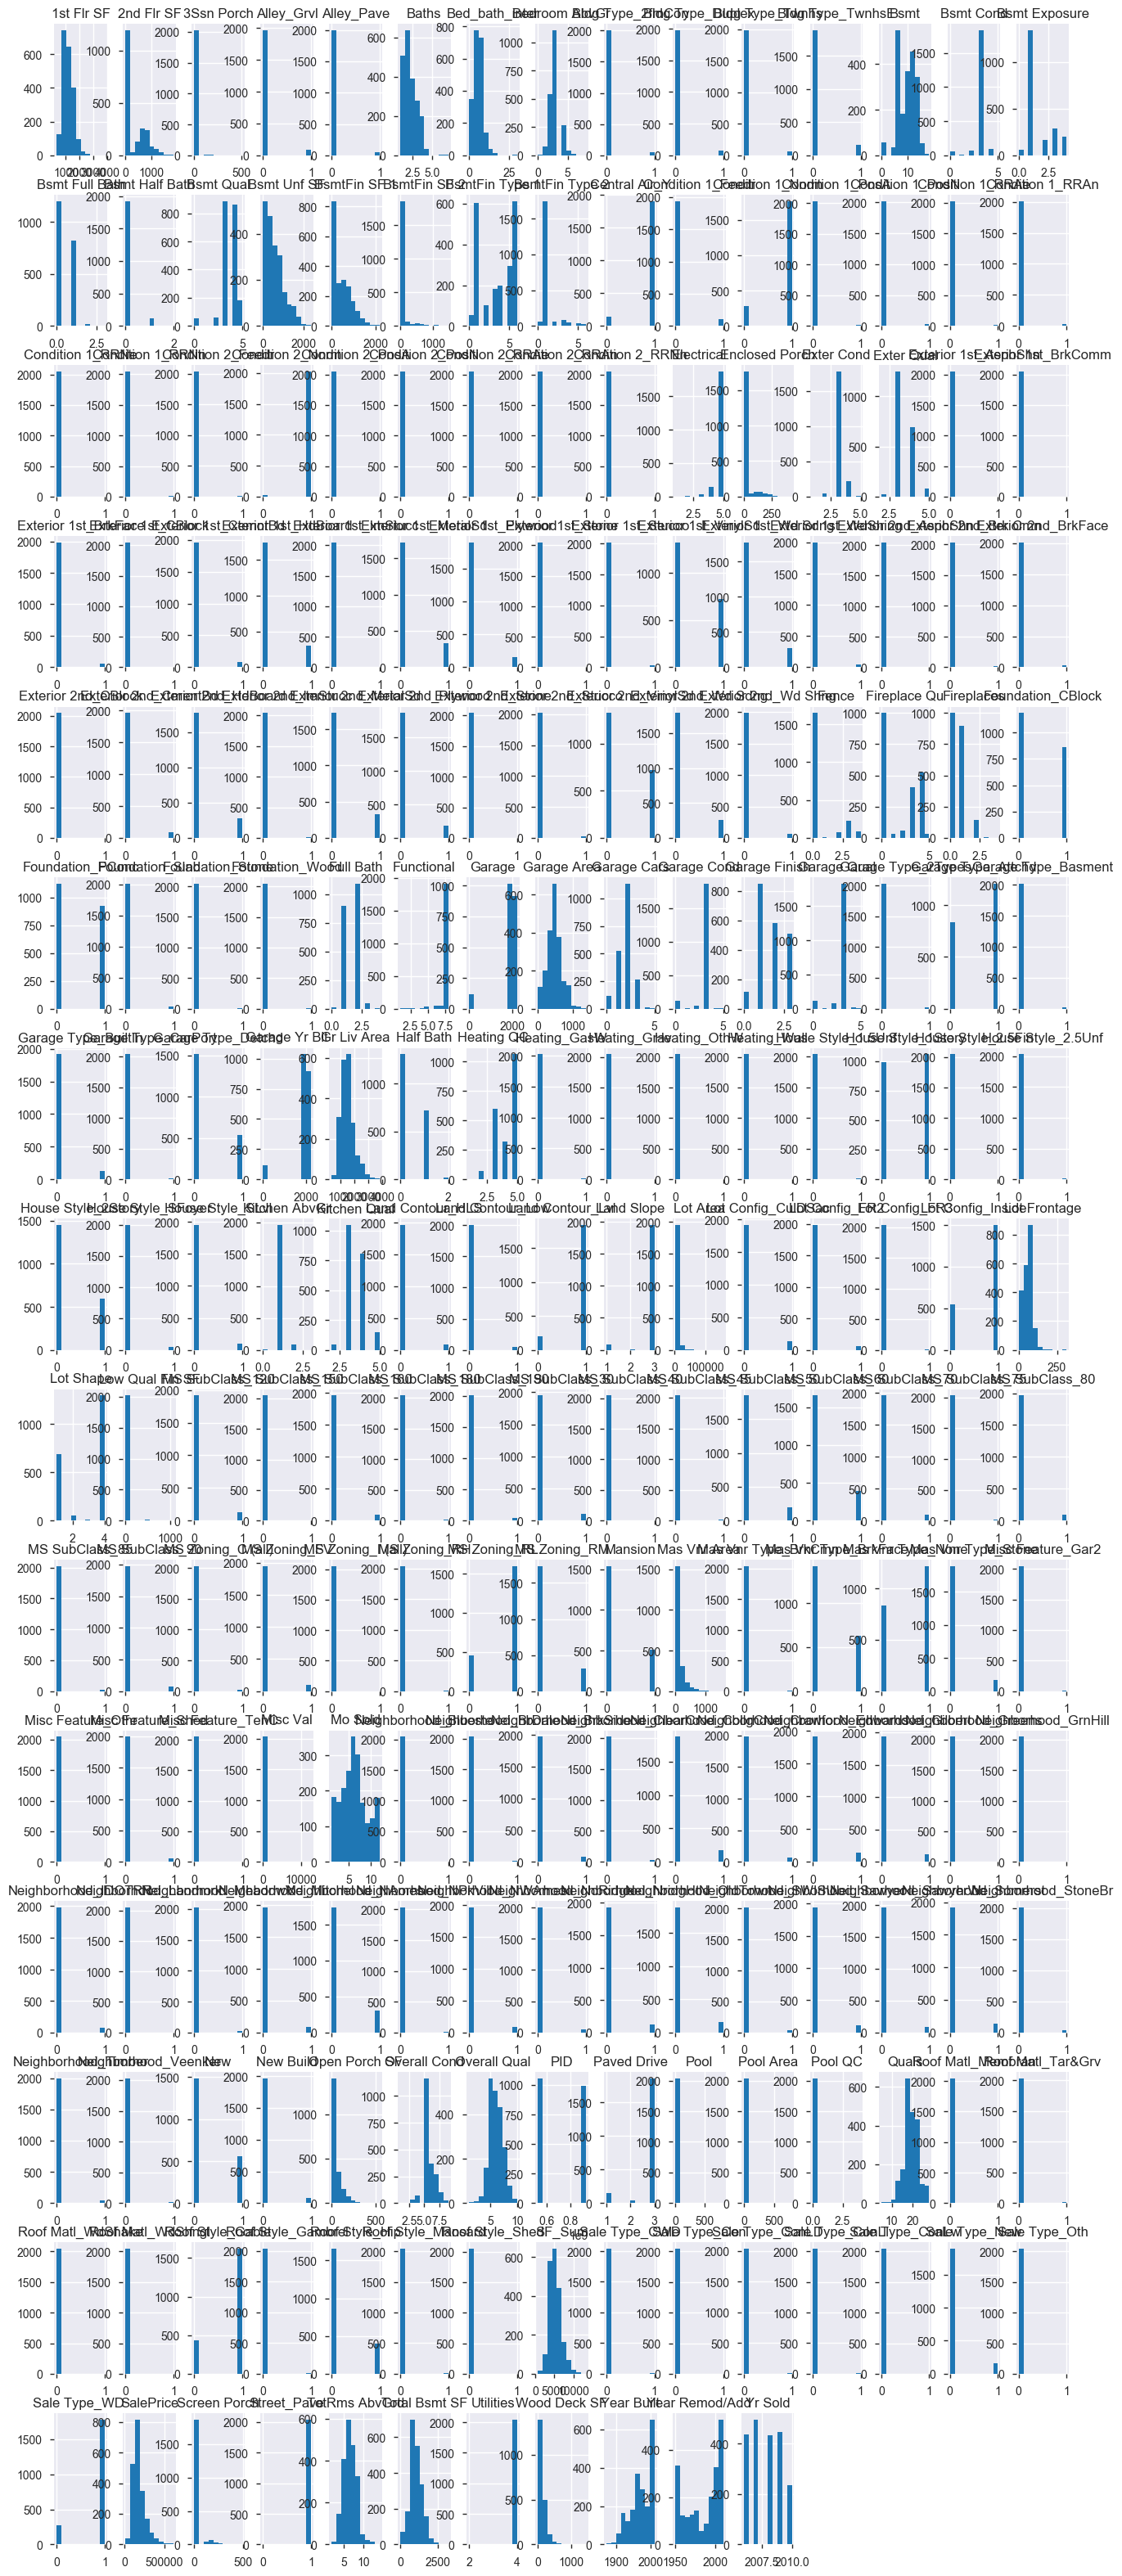

In [21]:
df_train.hist(figsize = (16,40));

Create a new variable to hold the corrolated data frame.

In [22]:
corr_map = df_train.corr()[['SalePrice']].sort_values("SalePrice",ascending = False)


View how all columns corrolate to the column 'SalePrice'

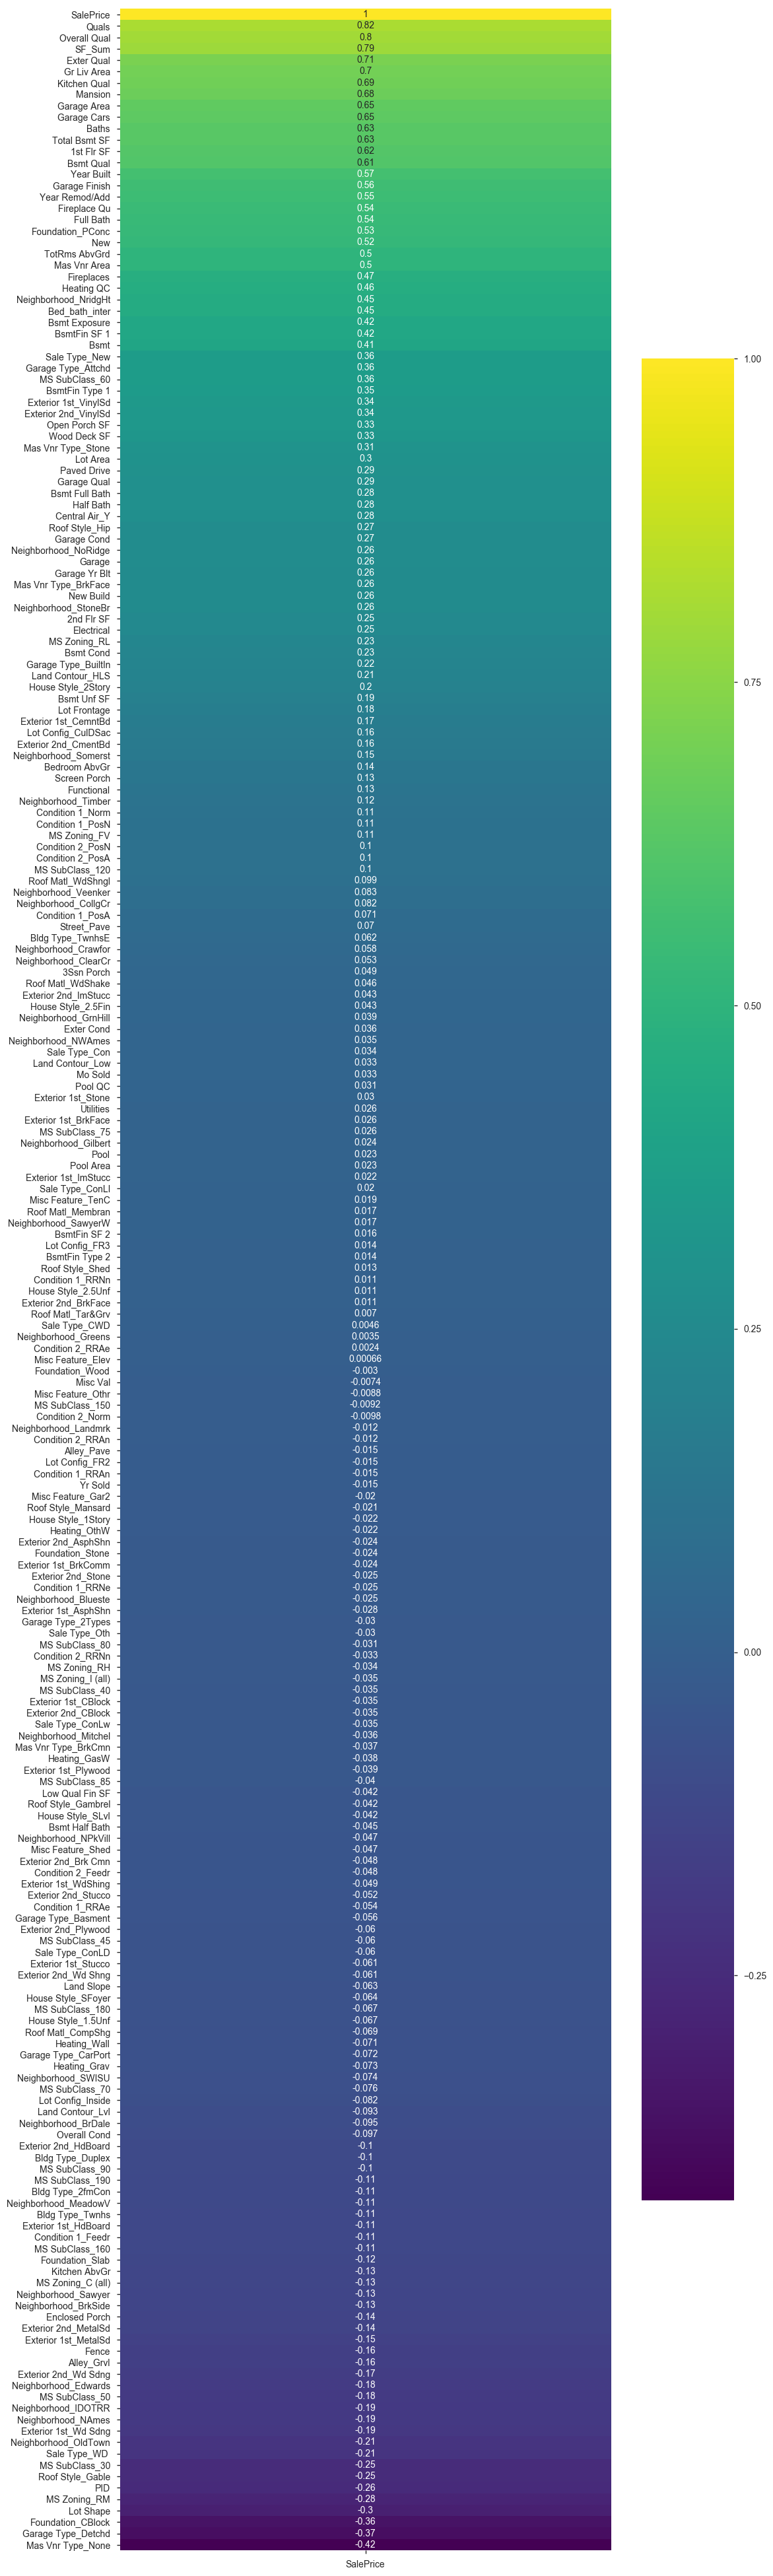

In [16]:
plt.figure(figsize = (12,50))
sns.heatmap(corr_map,annot = True, cmap='viridis')

Create a new variable to hold a list of columns that corrolate with 'SalePrice' with an absolute r2 score of .5 or more

## Choosing Feature Columns
---

In [23]:
corr_cols = corr_map[(abs(corr_map.SalePrice)>.54)]
corr_cols = corr_cols.index
corr_cols

Index(['SalePrice', 'SF_Sum', 'Quals', 'Overall Qual', 'Gr Liv Area',
       'Exter Qual', 'Kitchen Qual', 'Mansion', 'Total Bsmt SF', 'Garage Area',
       '1st Flr SF', 'Garage Cars', 'Baths', 'Bsmt Qual', 'Year Built',
       'Garage Finish', 'Year Remod/Add'],
      dtype='object')

Find columns that we shoudl reject because of colinearity

In [24]:
reject = pandas_profiling.ProfileReport(df_train[corr_cols]).get_rejected_variables()

In [25]:
corr_cols = corr_cols.drop(reject)
corr_cols

Index(['SalePrice', 'SF_Sum', 'Quals', 'Gr Liv Area', 'Exter Qual',
       'Kitchen Qual', 'Mansion', 'Total Bsmt SF', 'Garage Area', '1st Flr SF',
       'Garage Cars', 'Baths', 'Bsmt Qual', 'Year Built', 'Garage Finish',
       'Year Remod/Add'],
      dtype='object')

Perform a Heatmap to view if there is Colinearity

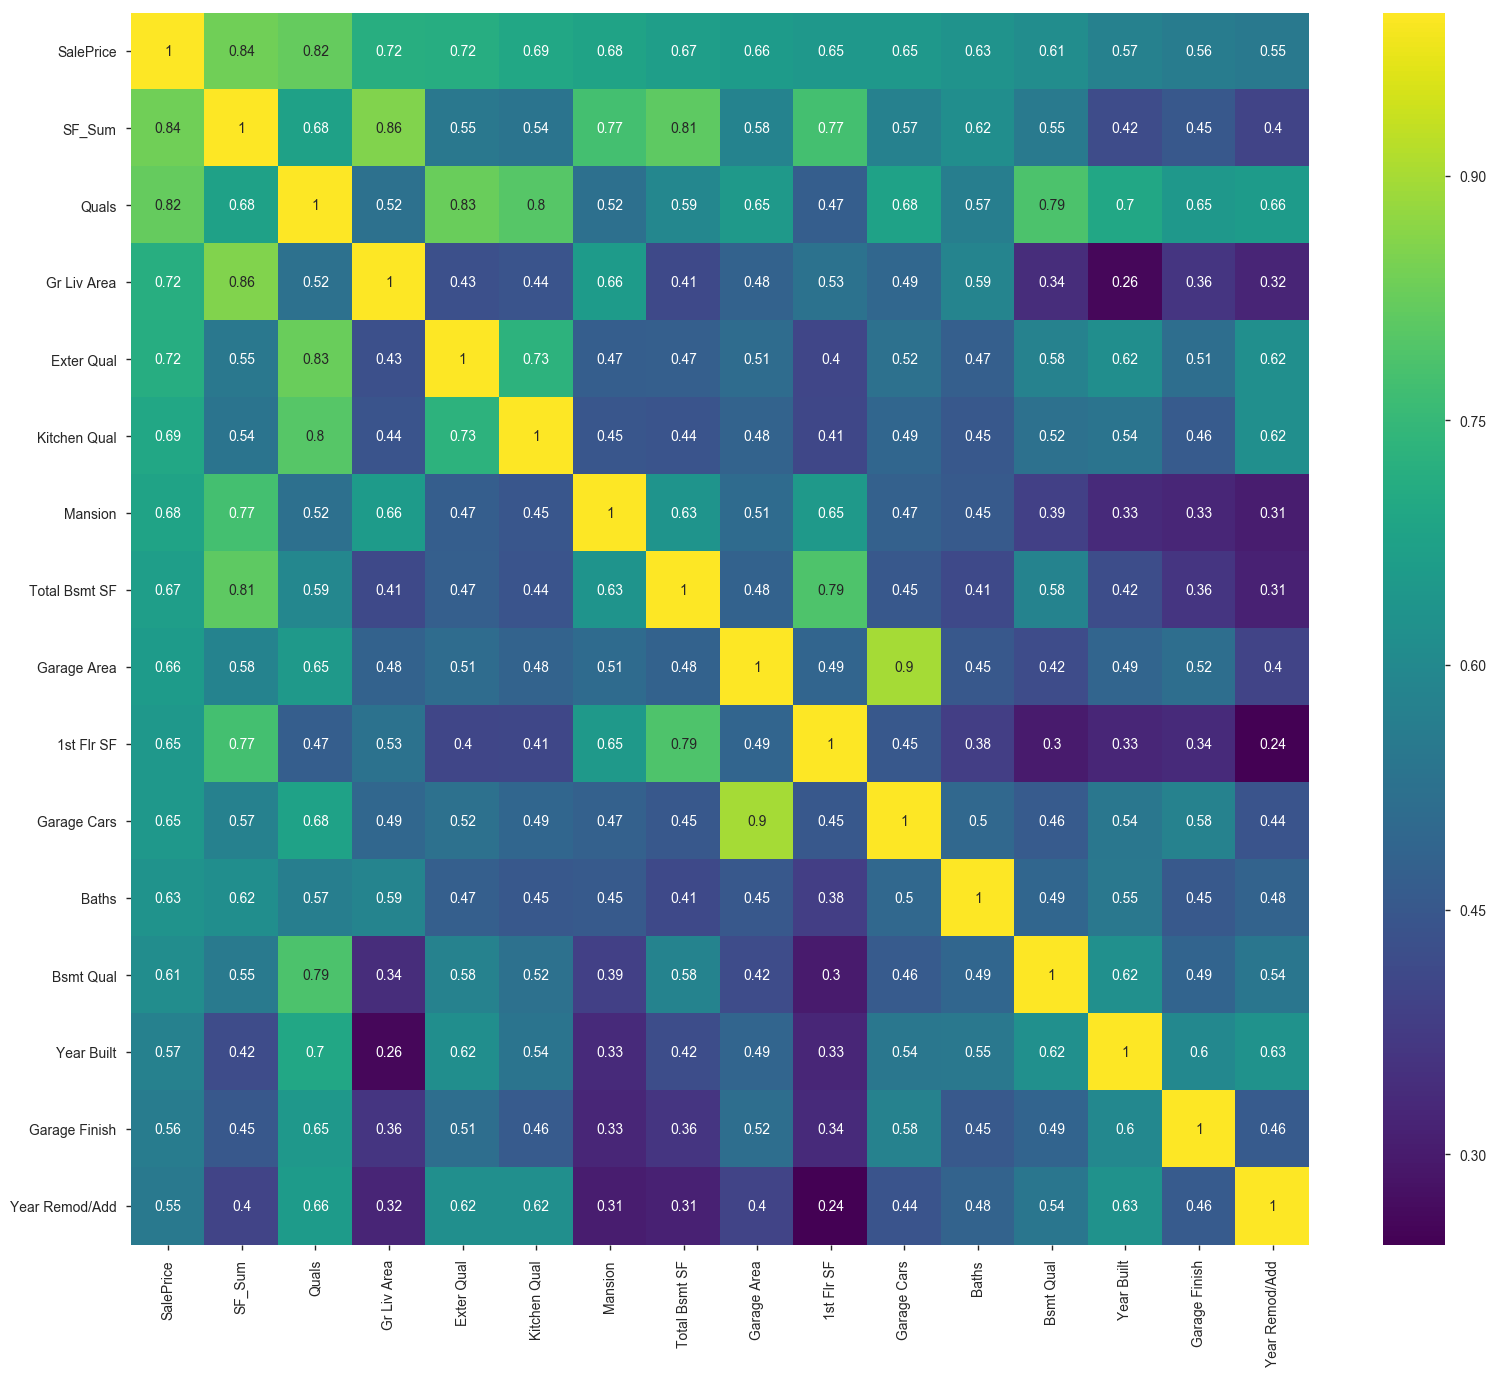

In [26]:
plt.figure(figsize = (19,16))
sns.heatmap(df_train[corr_cols].corr(),annot = True, cmap='viridis')

View a single column heatmap of our features to the saleprice

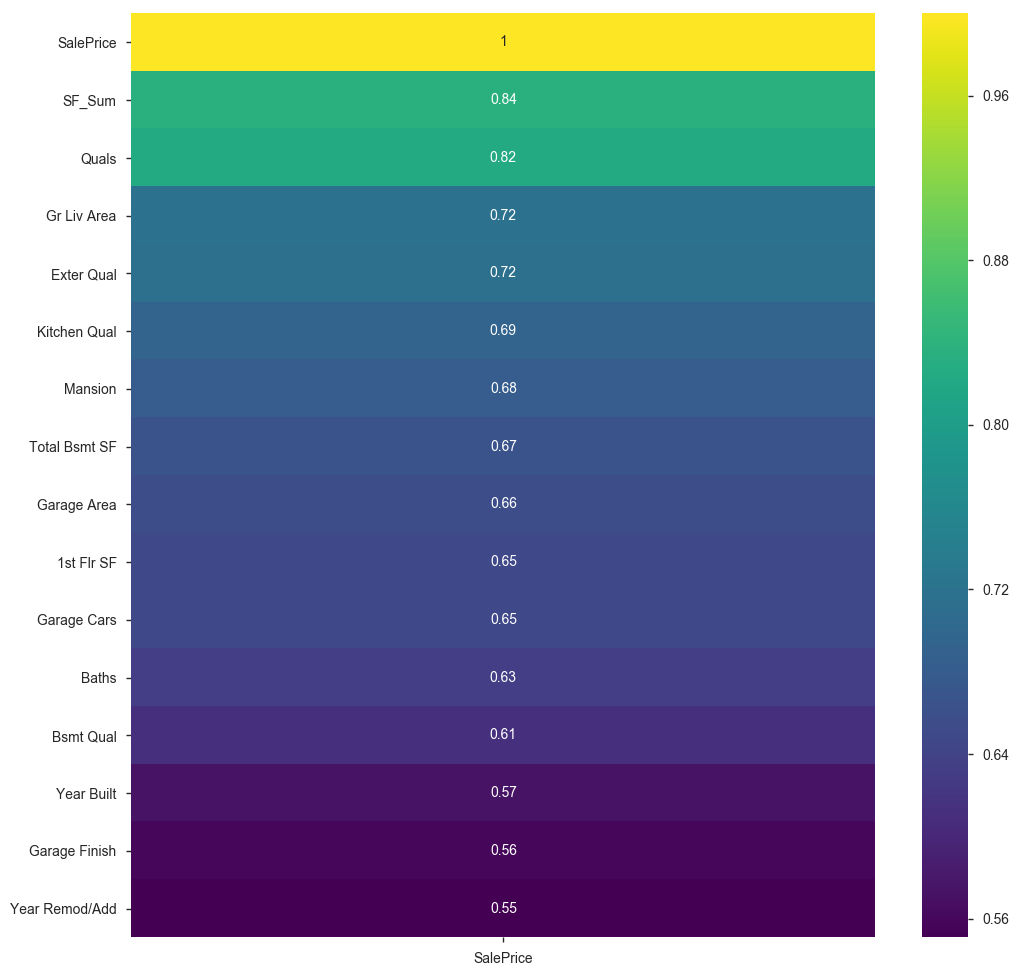

In [27]:
plt.figure(figsize = (12,12))
sns.heatmap(df_train[corr_cols].corr()[['SalePrice']],annot = True, cmap='viridis')

Filter through columns and pick and choose based off of my personal preference

In [28]:
cor_col = ['SalePrice','Quals','SF_Sum','Gr Liv Area','Garage Area',
                 'Full Bath','Year Built','Fireplaces','TotRms AbvGrd','PID','Baths','New','Mansion']

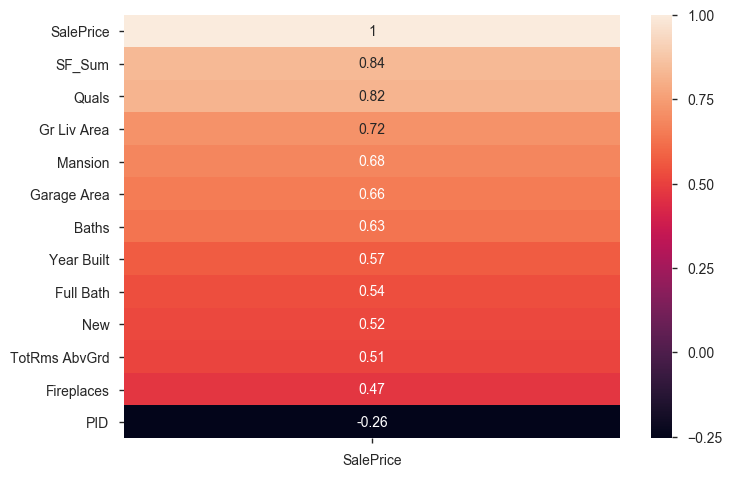

In [29]:
sns.heatmap(df_train[cor_col].corr()[['SalePrice']].sort_values('SalePrice',ascending = False),annot=True)

Remove the 'SalePrice' column from our choser columns

In [30]:
cor_col=corr_cols.drop('SalePrice')
cor_col 

Index(['SF_Sum', 'Quals', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual',
       'Mansion', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Garage Cars',
       'Baths', 'Bsmt Qual', 'Year Built', 'Garage Finish', 'Year Remod/Add'],
      dtype='object')

Perform a Pandas Profiling Profile Report on our current columns to evaluate our chosen columns and export to HTML

In [31]:
html_profile_report = pandas_profiling.ProfileReport(df_train[cor_col])
html_profile_report.to_file("../Profile_Report.html")

# Create Models 
---

Create a dictionary to hold our scores with a key that directs it to the model number that I have assigned to it

In [32]:
pipe_dict = {}

I created a pipeline that allows you to input whatever estimators, scalers, features that you would like and it will give you:
  - The best parameters (Via a Grid Search)
  - The Test and Training R^2 Score
  - The Test and Training Root Mean Squared Score
  - The Cross Value Score

In [59]:
def jacks_class_function_pipeline(dataframe,test_df,features,target,pipes,parameters,i):
    
    # Make X our features and y our target
    X = dataframe[features]
    y = dataframe[target]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3)
    
     # Instantiate the pipeling
    pipe = Pipeline(pipes)
    
    # fit the model
    pp_model = pipe.fit(X_train,y_train)
    
    # set parameters
    params = parameters
    
    # Do a Grid Search to find the best parameters that were provided
    grid = GridSearchCV(estimator = pipe,param_grid = params,verbose = 2,
                        n_jobs = 5)
    
    # Fit the Grid Search
    grid.fit(X_train,y_train)
    
    # find the best parameter
    best = grid.best_estimator_
    
    # Fit the data to the best parameter
    best.fit(X_train,y_train)
    
    # Create Predicted Y hats for train and test 
    y_hat_train = best.predict(X_train)
    y_hat_test = best.predict(X_test)
    
    # Check Cross Validation Score
    cvs = cross_val_score(best,X_train,y_train,cv = 5).mean()
    print('==============================')
    
    # Print the best model
    print(best)
    print('==============================')
    
    # Print the Cross Validation Score
    print("Our CV Score is:",cvs)
    train_RMSE = np.sqrt(mean_squared_error(y_hat_train, y_train))
    test_RMSE = np.sqrt(mean_squared_error(y_hat_test, y_test))
    
    # Print the R^2 Score for the train and test data
    train_r2 = r2_score(y_hat_train, y_train)
    test_r2 = r2_score(y_hat_test, y_test)
    print('==============================')
    print("Our Train r2 Score is:",train_r2)
    print("Our Test r2 Score is:",test_r2)
    print('==============================')
    
    # Print the RMSE Score for the train and test data
    print("Our Train RMSE Score for our Pipeline Model is:",  
          np.sqrt(mean_squared_error(y_hat_train, y_train)))
    print("Our Test RMSE Score for our Pipeline Model is:",
          np.sqrt(mean_squared_error(y_hat_test, y_test)))
    print('==============================')
    
    # Print the best parameters
    print('The best parameters were:',grid.best_params_)
    print('==============================')
    
    # Create a new data frame from our Holdout data and only take the features that we are using
    X_pp_kaggle = df_test[features]
    # Predict the sale price on our Holdout data by using our best model
    X_pp_kaggle['SalePrice'] = best.predict(X_pp_kaggle)
    # Drop all of the feature columns from the new Data Frame
    X_pp_kaggle.drop(features, axis=1, inplace=True)
    # Export the Data Frame to a CSV to be able to submit to Kaggle
    X_pp_kaggle.to_csv(f"../submissions/jack_bibi_submission_{i}.csv")
    
    #
    pipe_dict[i] = [test_RMSE,train_RMSE,f'{round(((test_RMSE/train_RMSE)-1)*100,2)}% more',cvs,test_r2,train_r2,grid.best_params_,features]

#### 1 Linear Regression

In [60]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('lr',LinearRegression())],{},1)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    1.3s finished


Pipeline(memory=None,
     steps=[('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])
Our CV Score is: 0.8395550655571336
Our Train r2 Score is: 0.8169950458571232
Our Test r2 Score is: 0.8093745542302969
Our Train RMSE Score for our Pipeline Model is: 30831.591531853173
Our Test RMSE Score for our Pipeline Model is: 32177.80123451903
The best parameters were: {}


#### 2 Ridge Model

In [61]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('ridge',RidgeCV())],{},2)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    1.0s finished


Pipeline(memory=None,
     steps=[('ridge', RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])
Our CV Score is: 0.8393342826973054
Our Train r2 Score is: 0.8159497684817125
Our Test r2 Score is: 0.7867605848594403
Our Train RMSE Score for our Pipeline Model is: 30473.28609137775
Our Test RMSE Score for our Pipeline Model is: 33091.7330494915
The best parameters were: {}


#### 3 Lasso Model

In [62]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('lasso',LassoCV())],{},3)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.1s finished


Pipeline(memory=None,
     steps=[('lasso', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])
Our CV Score is: 0.7730531880855755
Our Train r2 Score is: 0.7173289713675437
Our Test r2 Score is: 0.745381366674037
Our Train RMSE Score for our Pipeline Model is: 37023.17283682326
Our Test RMSE Score for our Pipeline Model is: 34916.65718325823
The best parameters were: {}


#### 4 Standard Scaler and Linear Regression

In [63]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('ss',StandardScaler()),('lr',LinearRegression())],{},4)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])
Our CV Score is: 0.8279157575944321
Our Train r2 Score is: 0.7996055553260806
Our Test r2 Score is: 0.8198413901218239
Our Train RMSE Score for our Pipeline Model is: 31313.451080326693
Our Test RMSE Score for our Pipeline Model is: 31375.02258185854
The best parameters were: {}


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.0s finished


#### 5 Standard Scaler and Ridge Model

In [64]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('ss',StandardScaler()),('ridge',RidgeCV())],{},5)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])
Our CV Score is: 0.8406305758101673
Our Train r2 Score is: 0.8176560513071477
Our Test r2 Score is: 0.8173239455577992
Our Train RMSE Score for our Pipeline Model is: 31293.277463970422
Our Test RMSE Score for our Pipeline Model is: 31219.631994924934
The best parameters were: {}


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.0s finished


#### 6 Standard Scaler and Lasso Model

In [65]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('ss',StandardScaler()),('lasso',LassoCV())],{},6)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.1s finished


Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])
Our CV Score is: 0.8469585348488871
Our Train r2 Score is: 0.8247150381218544
Our Test r2 Score is: 0.7760340358252875
Our Train RMSE Score for our Pipeline Model is: 29914.8561783144
Our Test RMSE Score for our Pipeline Model is: 34218.18396354681
The best parameters were: {}


#### 7 Standard Scaler and Elastic Net Model

In [66]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('ss',StandardScaler()),('elast',ElasticNetCV())],
                              {'elast__l1_ratio':np.linspace(.01,1,10)},7)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.4s finished


Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elast', ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=1.0, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0))])
Our CV Score is: 0.8390335220144621
Our Train r2 Score is: 0.8122747785656431
Our Test r2 Score is: 0.800250816754246
Our Train RMSE Score for our Pipeline Model is: 31008.351163150342
Our Test RMSE Score for our Pipeline Model is: 32042.769312024997
The best parameters were: {'elast__l1_ratio': 1.0}


#### 8 Standard Scaler Polynomial Features and Linear Regression

In [67]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('ss',StandardScaler()),
                   ('lr',LinearRegression())],{'poly__degree':[1,2,3,4]},8)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  10 out of  12 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed:    2.1s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])
Our CV Score is: 0.8451422177555932
Our Train r2 Score is: 0.829069940006485
Our Test r2 Score is: 0.7765841672511986
Our Train RMSE Score for our Pipeline Model is: 29090.381040478595
Our Test RMSE Score for our Pipeline Model is: 35926.23662758202
The best parameters were: {'poly__degree': 1}


#### 9 Standard Scaler Polynomial Features and Ridge Model

In [68]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('ss',StandardScaler()),
                   ('ridge',RidgeCV())],{'poly__degree':[1,2,3,4]},9)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed:    2.6s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])
Our CV Score is: 0.9020190968726338
Our Train r2 Score is: 0.905939270580715
Our Test r2 Score is: 0.8767117244059298
Our Train RMSE Score for our Pipeline Model is: 23383.97666523403
Our Test RMSE Score for our Pipeline Model is: 25396.837941503098
The best parameters were: {'poly__degree': 2}


#### 10 Standard Scaler Polynomial Features and Lasso Model

In [69]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('ss',StandardScaler()),
                   ('lasso',LassoCV())],{'poly__degree':[1,2,3]},10)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of   9 | elapsed:    1.6s remaining:    1.3s
[Parallel(n_jobs=5)]: Done   9 out of   9 | elapsed:   28.0s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])
Our CV Score is: 0.9026098937051785
Our Train r2 Score is: 0.9019613568012198
Our Test r2 Score is: 0.8842084161676931
Our Train RMSE Score for our Pipeline Model is: 23644.012496378044
Our Test RMSE Score for our Pipeline Model is: 25340.573590902764
The best parameters were: {'poly__degree': 3}


#### 11 Standard Scaler Polynomial Features and Elastic Net Model

In [70]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('ss',StandardScaler()),
                   ('elast',ElasticNetCV())],
                              {'poly__degree':[1,2,3],'elast__l1_ratio':np.linspace(.1,1,5)},11)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:   48.9s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elast', ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=1.0, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0))])
Our CV Score is: 0.8983734046373242
Our Train r2 Score is: 0.9065991077603346
Our Test r2 Score is: 0.8760069782091255
Our Train RMSE Score for our Pipeline Model is: 23036.01362186256
Our Test RMSE Score for our Pipeline Model is: 25914.00963580305
The best parameters were: {'elast__l1_ratio': 1.0, 'poly__degree': 3}


#### 12 Standard Scaler Polynomial Features Power Transform and Linear Regression

In [71]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('pt',PowerTransformer()),
                   ('ss',StandardScaler()),('lr',LinearRegression())],
                              {'poly__degree':[1,2,3,4]},12)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of  12 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=5)]: Done  10 out of  12 | elapsed:   12.1s remaining:    2.4s
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed:   22.5s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('pt', PowerTransformer(copy=True, method='yeo-johnson', standardize=True)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])
Our CV Score is: 0.8117652614167723
Our Train r2 Score is: 0.7863983558837715
Our Test r2 Score is: 0.7322693121283704
Our Train RMSE Score for our Pipeline Model is: 31291.524018268068
Our Test RMSE Score for our Pipeline Model is: 39358.773058490944
The best parameters were: {'poly__degree': 1}


#### 13 Standard Scaler Polynomial Features Power Transform and Ridge Model

In [72]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('pt',PowerTransformer()),
                   ('ss',StandardScaler()),('ridge',RidgeCV())],
                              {'poly__degree':[1,2,3,4]},13)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of  12 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=5)]: Done  10 out of  12 | elapsed:   11.9s remaining:    2.4s
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed:   21.8s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('pt', PowerTransformer(copy=True, method='yeo-johnson', standardize=True)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])
Our CV Score is: 0.8970104339320543
Our Train r2 Score is: 0.9121839971315809
Our Test r2 Score is: 0.8756603962019016
Our Train RMSE Score for our Pipeline Model is: 22037.668055046168
Our Test RMSE Score for our Pipeline Model is: 27233.661649466532
The best parameters were: {'poly__degree': 3}


#### 14 Standard Scaler Polynomial Features Power Transform and Lasso Model

In [75]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('pt',PowerTransformer()),
                   ('ss',StandardScaler()),('lasso',LassoCV())],
                              {'poly__degree':[1,2,3]},14)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of   9 | elapsed:    2.9s remaining:    2.3s
[Parallel(n_jobs=5)]: Done   9 out of   9 | elapsed:  1.1min finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('pt', PowerTransformer(copy=True, method='yeo-johnson', standardize=True)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])
Our CV Score is: 0.8913902388962522
Our Train r2 Score is: 0.8913803747967819
Our Test r2 Score is: 0.8752489134096592
Our Train RMSE Score for our Pipeline Model is: 24754.197641331153
Our Test RMSE Score for our Pipeline Model is: 26424.62313118922
The best parameters were: {'poly__degree': 3}


#### 15 Standard Scaler Polynomial Features Power Transform and Elastic Net Model

In [76]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('pt',PowerTransformer()),
                   ('ss',StandardScaler()),('elast',ElasticNetCV())],
                              {'poly__degree':[1,2,3],'elast__l1_ratio':np.linspace(.01,1,5)},15)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.4min finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('pt', PowerTransformer(copy=True, method='yeo-johnson', standardize=True)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elast', ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.0...ive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0))])
Our CV Score is: 0.8779357540760685
Our Train r2 Score is: 0.8809429627021836
Our Test r2 Score is: 0.897308059146438
Our Train RMSE Score for our Pipeline Model is: 25086.057139963617
Our Test RMSE Score for our Pipeline Model is: 24876.078462315727
The best parameters were: {'elast__l1_ratio': 1.0, 'poly__degree': 3}


#### 16 Polynomial Features Power Transform and Linear Regression Model

In [77]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),
                   ('lr',LinearRegression())],
                              {'poly__degree':[1,2,3,4]},16)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  10 out of  12 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed:    1.8s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])
Our CV Score is: 0.8860958236808208
Our Train r2 Score is: 0.9167056609471389
Our Test r2 Score is: 0.8771649722069832
Our Train RMSE Score for our Pipeline Model is: 22028.082157278925
Our Test RMSE Score for our Pipeline Model is: 26903.30583673324
The best parameters were: {'poly__degree': 2}


#### 17 Polynomial Features Power Transform and Ridge Model

In [78]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('pt',PowerTransformer()),
                   ('ridge',RidgeCV())],
                              {'poly__degree':[1,2,3,4]},17)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  12 | elapsed:   13.2s remaining:    2.6s
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed:   15.4s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('pt', PowerTransformer(copy=True, method='yeo-johnson', standardize=True)), ('ridge', RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False))])
Our CV Score is: 0.8924636725034905
Our Train r2 Score is: 0.905241716594153
Our Test r2 Score is: 0.8775118648649811
Our Train RMSE Score for our Pipeline Model is: 23551.240299807992
Our Test RMSE Score for our Pipeline Model is: 25243.268711418084
The best parameters were: {'poly__degree': 2}


#### 18 Polynomial Features Power Transform and Lasso Model

In [79]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('pt',PowerTransformer()),
                   ('lasso',LassoCV())],
                              {'poly__degree':[1,2,3]},18)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 out of   9 | elapsed:    1.4s remaining:    1.1s
[Parallel(n_jobs=5)]: Done   9 out of   9 | elapsed:   51.8s finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('pt', PowerTransformer(copy=True, method='yeo-johnson', standardize=True)), ('lasso', LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])
Our CV Score is: 0.8939364844909207
Our Train r2 Score is: 0.8940655332042287
Our Test r2 Score is: 0.8706061006981711
Our Train RMSE Score for our Pipeline Model is: 25020.845464526028
Our Test RMSE Score for our Pipeline Model is: 25261.387239573305
The best parameters were: {'poly__degree': 3}


#### 19 Polynomial Features Power Transform and Elastic Net Model

In [80]:
jacks_class_function_pipeline(df_train,df_test,cor_col,'SalePrice',
                  [('poly',PolynomialFeatures()),('pt',PowerTransformer()),
                   ('elast',ElasticNetCV())],
                              {'poly__degree':[1,2,3],'elast__l1_ratio':np.linspace(.01,1,5)},19)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  36 out of  45 | elapsed:   13.7s remaining:    3.4s
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.4min finished


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('pt', PowerTransformer(copy=True, method='yeo-johnson', standardize=True)), ('elast', ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=1.0, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0))])
Our CV Score is: 0.8862137123336385
Our Train r2 Score is: 0.8848940380414861
Our Test r2 Score is: 0.8963241599486171
Our Train RMSE Score for our Pipeline Model is: 25263.520304062742
Our Test RMSE Score for our Pipeline Model is: 24442.42479936905
The best parameters were: {'elast__l1_ratio': 1.0, 'poly__degree': 3}


# Conclusion
---

Create a DataFrame for all of the data from the dictionary that we created earlier. 
We renamed the index and the columns accordingly

In [81]:
model_df = pd.DataFrame.from_dict(pipe_dict)
model_df.rename(columns = {1:'Linear Regression',
2:'Ridge Model',
3:'Lasso Model',
4: "Standard Scaler and Linear Regression",
5: "Standard Scaler and Ridge Model",
6: "Standard Scaler and Lasso Model",
 7: "Standard Scaler and Elastic Net Model",
 8: "Standard Scaler, Polynomial Features and Linear Regression",
 9: "Standard Scaler, Polynomial Features and Ridge Model",
 10: "Standard Scaler, Polynomial Features and Lasso Model",
 11: "Standard Scaler, Polynomial Features and Elastic Net Model",
 12: "Standard Scaler, Polynomial Features, Power Transform and Linear Regression",
 13: "Standard Scaler, Polynomial Features, Power Transform and Ridge Model",
 14: "Standard Scaler, Polynomial Features, Power Transform and Lasso Model",
 15: "Standard Scaler, Polynomial Features, Power Transform and Elastic Net Model",
 16: "Polynomial Features, Power Transform and Linear Regression",
 17: "Polynomial Features, Power Transform and Ridge Model",
 18: "Polynomial Features, Power Transform and Lasso Model",
 19: "Polynomial Features, Power Transform and Elastic Net Model",
},inplace=True)
model_df.rename(index = {0:'Test RMSE',1:'Train RMSE',2:'Train RMSE % more',3:"CV Score",
                           4:'Test r2 Score',5:'Train r2 Score',6:'Best Parameters',7:'Features'},inplace=True)

In [83]:
model_df.T.sort_values('Test RMSE')

Test RMSE Train RMSE  \
Polynomial Features, Power Transform and Elasti...   24442.4    25263.5   
Standard Scaler, Polynomial Features, Power Tra...   24876.1    25086.1   
Polynomial Features, Power Transform and Ridge ...   25243.3    23551.2   
Polynomial Features, Power Transform and Lasso ...   25261.4    25020.8   
Standard Scaler, Polynomial Features and Lasso ...   25340.6      23644   
Standard Scaler, Polynomial Features and Ridge ...   25396.8      23384   
Standard Scaler, Polynomial Features and Elasti...     25914      23036   
Standard Scaler, Polynomial Features, Power Tra...   26424.6    24754.2   
Polynomial Features, Power Transform and Linear...   26903.3    22028.1   
Standard Scaler, Polynomial Features, Power Tra...   27233.7    22037.7   
Standard Scaler and Ridge Model                      31219.6    31293.3   
Standard Scaler and Linear Regression                  31375    31313.5   
Standard Scaler and Elastic Net Model                32042.8    31008.4   
Linear Regression                                    32177.8    30831.6   
Ridge Model                                          33091.7    30473.3   
Standard Scaler and Lasso Model                      34218.2    29914.9   
Lasso Model                                          34916.7    37023.2   
Standard Scaler, Polynomial Features and Linear...   35926.2    29090.4   
Standard Scaler, Polynomial Features, Power Tra...   39358.8    31291.5   

                                                   Train RMSE % more  \
Polynomial Features, Power Transform and Elasti...       -3.25% more   
Standard Scaler, Polynomial Features, Power Tra...       -0.84% more   
Polynomial Features, Power Transform and Ridge ...        7.18% more   
Polynomial Features, Power Transform and Lasso ...        0.96% more   
Standard Scaler, Polynomial Features and Lasso ...        7.18% more   
Standard Scaler, Polynomial Features and Ridge ...        8.61% more   
Standard Scaler, Polynomial Features and Elasti...       12.49% more   
Standard Scaler, Polynomial Features, Power Tra...        6.75% more   
Polynomial Features, Power Transform and Linear...       22.13% more   
Standard Scaler, Polynomial Features, Power Tra...       23.58% more   
Standard Scaler and Ridge Model                          -0.24% more   
Standard Scaler and Linear Regression                      0.2% more   
Standard Scaler and Elastic Net Model                     3.34% more   
Linear Regression                                         4.37% more   
Ridge Model                                               8.59% more   
Standard Scaler and Lasso Model                          14.39% more   
Lasso Model                                              -5.69% more   
Standard Scaler, Polynomial Features and Linear...        23.5% more   
Standard Scaler, Polynomial Features, Power Tra...       25.78% more   

                                                    CV Score Test r2 Score  \
Polynomial Features, Power Transform and Elasti...  0.886214      0.896324   
Standard Scaler, Polynomial Features, Power Tra...  0.877936      0.897308   
Polynomial Features, Power Transform and Ridge ...  0.892464      0.877512   
Polynomial Features, Power Transform and Lasso ...  0.893936      0.870606   
Standard Scaler, Polynomial Features and Lasso ...   0.90261      0.884208   
Standard Scaler, Polynomial Features and Ridge ...  0.902019      0.876712   
Standard Scaler, Polynomial Features and Elasti...  0.898373      0.876007   
Standard Scaler, Polynomial Features, Power Tra...   0.89139      0.875249   
Polynomial Features, Power Transform and Linear...  0.886096      0.877165   
Standard Scaler, Polynomial Features, Power Tra...   0.89701       0.87566   
Standard Scaler and Ridge Model                     0.840631      0.817324   
Standard Scaler and Linear Regression               0.827916      0.819841   
Standard Scaler and Elastic Net Model               0.839034      0.800251   
Linear Regression

Prepare the Dataframe and export the table as an HTML file

In [ ]:
model_df = model_df.T.sort_values('Test RMSE')
model_df.to_html('../Table')